# Example Linear Regression

This notebook contains a walkthrough of a simple linear regression. The data, obtained from [college.cengage.com](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html), relates the rate of cricket chirps to temperature from *The Song of Insects*, by Dr. G. W. Pierce, Harvard College Press.

In this example we're using the count of chirps per minute as the independent varible to then predict the dependent variable, temperature. In short, we're using a little data science to make ourselves a cricket thermometer. (You could also reverse the data and use temperature to predict the number of chirps, but it's more fun to use crickets as the thermometer itself!) 

The methods shown in this example follow what's presented in the Udemy course, [Machine Learning A to Z](https://www.udemy.com/machinelearning/learn/v4/).

A lovely aspects of Notebooks is that you can use Markdown cells to explain what the code is doing rather than code comments. There are several benefits to doing so:

- Markdown allows for richer text formatting, like *italics*, **bold**, `inline code`, hyperlinks, and headers.
- Markdown cells automatically word wrap whereas code cells do not. Code comments typically use explicit line breaks for formatting, but that's not necessary in Markdown.
- Using Markdown cells makes it easier to run the Notebook as a slide show.
- Markdown cells help you remove lengthy comments from the code, making the code easier to scan.

When you run a code cell, Jupyter executes the code; when you run a Markdown cell, Jupyter renders all the formatting into text that's suitable for presentation.


## Install packages using pip or conda

Because the code in your notebook likely uses some Python packages, you need to make sure the Notebook environment contains those packages. You can do this directly within the notebook in a code block that contains the appropriate pip or conda commands prefixed by `!`:

```
!pip install <pkg name> 

!conda install <pkg name> -y
```

This present notebook requires numpy, matplotlib, pandas, and sklearn. Because these packages are already included in Azure Notebooks, the following commands are commented out but are included to clearly note the dependencies.

In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install sklearn

Note that when you run a code block that contains install commands, and also those with `import` statements, it make take the notebook a little time to complete the task. To the left of the code block you see `In [*]` to indicate that execution is happening. The Notebook's kernel on the upper right also shows a filled-in circle to indicate "busy."

## Import libraries and prepare the dataset

In this example we're using numpy, pandas, and matplotlib. Data is in the file cricket_chirps.csv. The cell below loads the file directly from the GitHub repository. If using colab, you should generally access data files remotely. On your own computer, the data file should be in the same project as this present Notebook, we can just load it using a relative pathname, e.g. `pd.read_csv('cricket_chirps.csv')`. 

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/kuo-courses/hw00-f19/master/cricket_chirps.csv')
print(dataset)
X = dataset.iloc[:, :-1].values  # Matrix of independent variables -- remove the last column in this data set
y = dataset.iloc[:, 1].values    # Matrix of dependent variables -- just the last column (1 == 2nd column)


    Chirps/Minute  Temperature
0            20.0         88.6
1            16.0         71.6
2            19.8         93.3
3            18.4         84.3
4            17.1         80.6
5            15.5         75.2
6            14.7         69.7
7            17.1         82.0
8            15.4         69.4
9            16.2         83.3
10           15.0         79.6
11           17.2         82.6
12           16.0         80.6
13           17.0         83.5
14           14.4         76.3


Next, split the dataset into a Training set (2/3rds) and Test set (1/3rd). We don't need to do any feature scaling because there is only one column of independent variables, and libraries typically do scaling for you.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Fit the data to the training set

"Fitting" the data to a training set means making the line that describes the relationship between the independent and the dependent variables. With a simple data set like we're using here, you can visualize the line on a simple x-y plot: the x-axis is the independent variable (chirp count in this example), and the y-axis is the independent variable (temperature). Fitting the data means plotting all the points in the training set, then drawing the best-fit line through that data.

With two independent variables you can imagine a three-dimensional plot with a line fitted to the data. At three or more independent variables, however, it's no longer easy to visualize the fit, but you get the idea. In the end, it's all just mathematics, which a computer can handle easily without having to form a mental picture!

The regressor's `fit` method here creates the line, which algebraically is of the form `y = x*b1 + b0`, where b1 is the coefficient or slope of the line (which you can get to through `regressor.coef_`), and b0 is the intercept of the line at x=0 (which you can get to through `regressor.intercept`).

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()    # This object is the regressor, that does the regression
regressor.fit(X_train, y_train)   # Provide training data so the machine can learn to predict using a learned model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the results

With the regressor in hand, we can predict the test set results using its `predict` method. That method takes a vector of independent variables for which you want predictions.

Because the regressor is fit to the data by virtue of `coef_` and `intercept_` and `coef_`, a prediction is the result of `coef_ * x + intercept_`. (Indeed, `predict(0)` returns `intercept_` and `predict(1)` returns `intercept_ + coef_`.)

In the code, the `y_test` matrix (from when we split the set) contains the real observations. `y_pred` assigned here contains the predictions for the same `X_test` inputs. It's not expected that the test or training points exactly fit the regression; the regression is trying to find the model that we can use to make predictions with new observations of the independent variables.

In [5]:
y_pred = regressor.predict(X_test)
print(y_pred)

[79.49588055 75.98873911 77.87719989 80.03544077 75.17939878]


It's interesting to think that all the "predictions" we use in daily life, like weather forecasts, are just regression models of some sort working with various data sets. Those models are much more complicated than what's shown here, but the idea is the same.

Knowing how predictions work help us understand that the actual observations we would collect in the moment will always be somewhat off from the predictions: the predictions fit exactly to the model, whereas the observations typically won't.

Of course, such systems feed new observations back into the dataset to continually improve the model, meaning that predictions should get more accurate over time.

The challenge is determining what data to actually use. For example, with weather, how far back in time do you go? How have weather patterns been changing decade by decade? In any case, something like weather predictions will be doing things hour by hour, day by day, for things like temperature, precipitation, winds, cloud cover, etc. Radar and other observations are of course fed into the model and the predictions are reduced to mathematics.

## Visualize the results

The following code generates a plot: green dots are training data, red dots are test data, blue dots are predictions. Gray line is the regression itself. You see that all the blue dots are exactly on the line, as they should be, because the predictions exactly fit the model (the line).

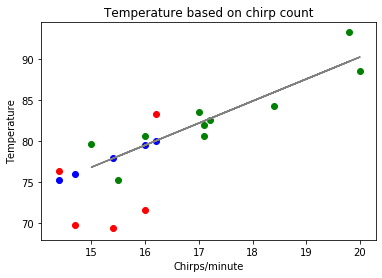

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'red')   
plt.scatter(X_test, y_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(X_train, regressor.predict(X_train), color = 'gray')
plt.title('Temperature based on chirp count')
plt.xlabel('Chirps/minute')
plt.ylabel('Temperature')
plt.show()

## Closing comments

At the end of the day, when you create a model, you use training data. Then you start feeding test data (real observations) to see how well the model actually works. You may find that the model is a little inaccurate over time, in which case you retrain the model with some new data. Retraining the model means you're creating a new fit line that's used for predictions.

This regression can be used to examine the variability of the relationship between temperature and chirp count. Of course, if the model proves too inaccurate (that is, the predictions aren't very good), then it suggests that we might need to introduce more independent variables like humidity, time of year, latitude, amount of moonlight, and so on. If you have such data, you can do separate lines regressions for each independent variable, and then do multiple regressions with combinations of independent variables. 

Again, once you are working with more than one or two independent variables, it's much easier to use machine learning to crunch the numbers than to try to visualize it graphically.